### Задача 1.2

Импорт необходимых библиотек

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

Определение системы

In [2]:
def odes(t,y,f_a):
    I, N = y
    dydt = [(N-1)*I,
            eta_g*(J+delta_a*np.sin(2*np.pi*f_a*t)-N*(1+I))        
    ]
    return dydt

Параметры (параметр накачки уменьшен на 25%)

In [3]:
tau_p=20*10**(-12)
tau_c=1*10**(-9)
eta_g=tau_p/tau_c
J=3
delta_a=0.1*J

В первой лабораторной работе значение частоты определено как $f_{ro}=1.923\text{ ГГц}$. Для перехода к нормированным единицам домножим на время жизни фотона в резонаторе:

In [4]:
f=1.923*10**9*tau_p
f_array=np.arange(0.05*f,1.25*f, (1.25*f-0.05*f)/20)

Получен массив из 20 значений для дальнейшего расчета. Для определения временного промежутка найдем величину $\frac{20}{f_A}$ (подобрана, так как $\frac{10}{f_A}$ демонстрирует некорректную зависимость):

In [5]:
t_range=20/f
t_range

520.0208008320333

В соответствии с первой лабораторной и рассчитанной величиной вводим начальные значения и вектор времени:

In [6]:
y0=(J-1,1)
t=np.linspace(0,260,2600)

Интегрирование системы с определением минимальных и максимальных значений интенсивности

In [7]:
I_min=np.empty(20)
I_max=np.empty(20)
for i in range(len(f_array)):
    solution_ivp=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y0, args=(f_array[i],), rtol=1e-8)
    #print(i)
    #print(solution_ivp.y[0])
    #print(max(solution_ivp.y[0]))
    #print(min(solution_ivp.y[0]))
    I_min[i]=min(solution_ivp.y[0])
    I_max[i]=max(solution_ivp.y[0])

Переход к частотам в ГГц

In [8]:
f_axis=f_array/(tau_p*10**9)

In [9]:
print(f_axis)
print(I_min)
print(I_max)

[0.09615 0.21153 0.32691 0.44229 0.55767 0.67305 0.78843 0.90381 1.01919
 1.13457 1.24995 1.36533 1.48071 1.59609 1.71147 1.82685 1.94223 2.05761
 2.17299 2.28837]
[2.         1.69395565 1.68593099 1.66982561 1.63936945 1.62055282
 1.60361272 1.55141538 1.49105811 1.4503591  1.36537668 1.27072142
 1.17144932 1.16636163 1.27058762 1.37571132 1.45919997 1.54945972
 1.582289   1.6138632 ]
[2.3006127  2.30972947 2.31050534 2.35522011 2.39590219 2.42274558
 2.43847392 2.49629203 2.59239501 2.72503634 2.82264767 2.98272203
 3.15275374 3.14348481 2.94970217 2.77488329 2.64213258 2.55809135
 2.47577226 2.39809106]


График

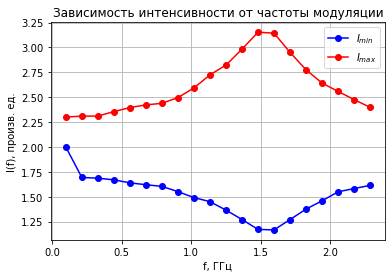

In [10]:
plt.clf()
plt.figure(1)
plt.title('Зависимость интенсивности от частоты модуляции')
plt.xlabel('f, ГГц')
plt.ylabel('I(f), произв. ед.') 
plt.plot(f_axis, I_min, color='blue', label='$I_{min}$', marker='o')
plt.plot(f_axis, I_max, color='red', label='$I_{max}$', marker='o')
plt.legend(loc='best')
plt.grid()
plt.savefig('graph1FINAL.png',dpi=600)